In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg as LA
from scipy.optimize import fsolve

In [2]:
def make_eig_spect(N, beta=1, alpha=2, flag=1):
    # makes the eigenvalue spectrum of the Kernel wirth desired properties:
    # flag=1 is for the exponential decay with exp(-beta*n), flag=0 is for the polynomial decay with n**(-alpha)
    if(flag==1):
        D = np.exp(-beta*np.linspace(1,N,N))
    else: 
        D = np.linspace(1,N,N)**(-alpha)     
    return D

def calc_emp_eigs(D, lambd=0, num_trials = 100):
    # for given eigenvalue spectrum D (of the Kernel K) 
    # calculates the eigenvalues of the (expected) empirical Kernel for various 
    # levels of implicit regularization, i.e. due to number of features
    N = D.size; P = N;    
    C = np.zeros((P,N))
    for P_temp in range(P): 
        P_in = P_temp + 1
        for it in range(num_trials):
            W = np.random.normal(0,1,size=(N,P_in))
            B = np.linalg.inv(np.matmul(np.matmul(W.T,np.diag(D)), W) + lambd*np.eye(P_in))
            for i in range(N):
                C[P_temp, i] += D[i] * np.inner(W[i,:], np.matmul(B, W[i,:]))
        C[P_temp, :] = C[P_temp, :] / num_trials 
    return C

def make_figure(D,C):
    # plots the eigenvalues of the (expected) empirical Kernel matrix along with 
    # the eigenvalues of the Kernel where the features are sampled
    P = C.shape[0]; N = C.shape[1];
    plt.figure(figsize=(14,5))
    plt.subplot(1,2,1)
    for i in range(N):
        plt.plot(D)
    plt.title('$d_i$')
    plt.ylabel('eigenvalues of the Kernel')

    plt.subplot(1,2,2)
    for i in range(P):
        plt.plot(C[i,:], '^', color=[0,(1/P)*i,(1/P)*i])
        plt.plot(C[i,:], color=[0,(1/P)*i,(1/P)*i])
    plt.title('$\hat{d}_i$')
    plt.ylabel('of empirical Kernels for various P')
    plt.show()
    
def find_eff_reg(D,P,lambd):
    # takes the inputs above and returns the effective regularizer 
    def f(z):
        s = 0;
        for i in range(N):
            s += D[i] / (D[i] + z) 
        return P*(1-lambd/z) - s
    sol = np.asscalar(fsolve(f, 0.01))
    if (sol > 0):
        return sol
    else:
        return 0

def calc_eff_regs(D, lambd_max = 1, num_lambd = 10):
    
    N = D.size; lambd_list = np.linspace(0,lambd_max,num_lambd);
    E = np.zeros((2*N,num_lambd));
    for itr in range(num_lambd):
        lambd = lambd_list[itr]
        for P0 in range(2*N):
            P = P0 + 1
            E[P0, itr] = find_eff_reg(D,P,lambd)
    return E

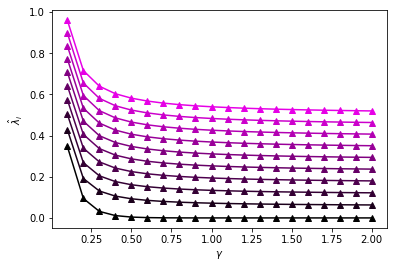

In [4]:
N = 10
D = make_eig_spect(N, beta=1, alpha=1.5, flag=1)
E = calc_eff_regs(D, lambd_max = 0.5)
for i in range(10):
    plt.plot(np.linspace(0.1,2,20), E[:,i], '^', color=[(1/N)*i,0,(1/N)*i])
    plt.plot(np.linspace(0.1,2,20), E[:,i], color=[(1/N)*i,0,(1/N)*i])
    plt.ylabel('$\hat{\lambda}_i$')
    plt.xlabel('$\gamma$')

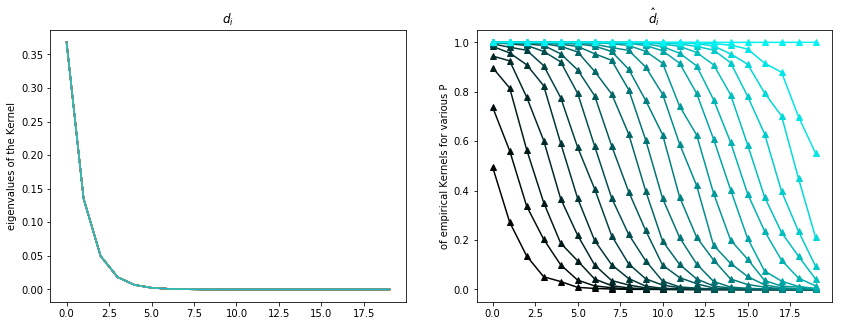

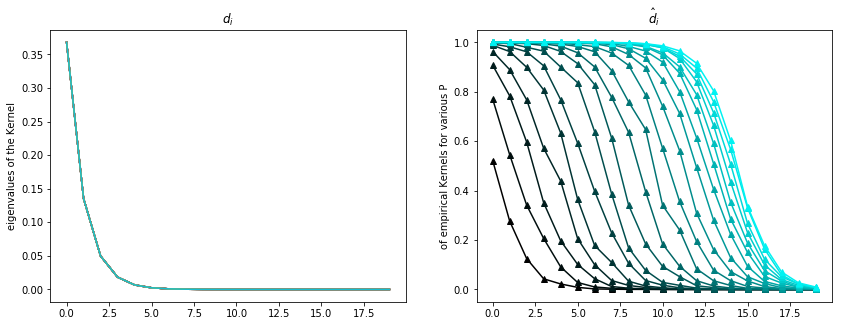

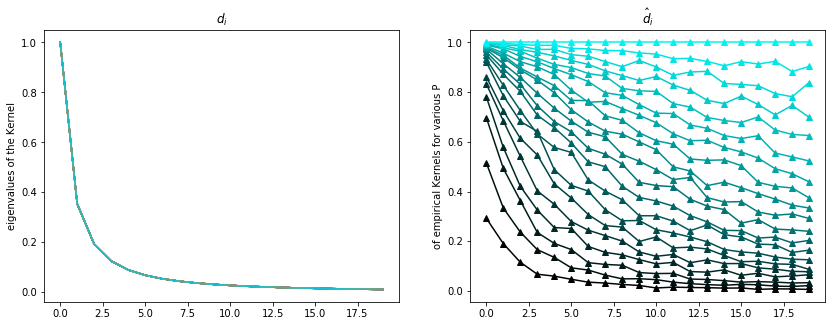

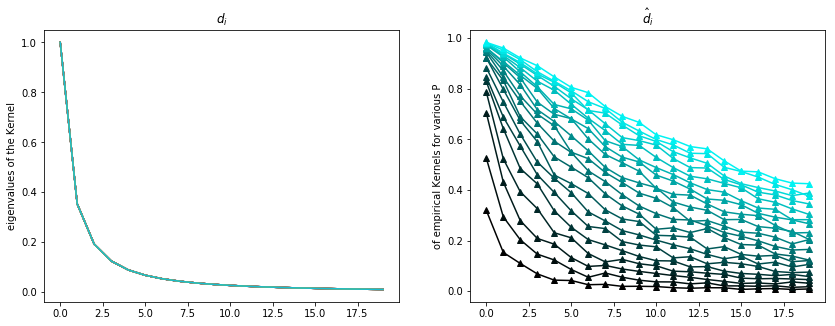

In [5]:
N = 20

# exponential decay with 1
D = make_eig_spect(N, beta=1, alpha=1.5, flag=1)
C = calc_emp_eigs(D)
make_figure(D,C)

# + some regularization lambd
D = make_eig_spect(N, beta=1, alpha=1.5, flag=1)
C = calc_emp_eigs(D, lambd=1e-6)
make_figure(D,C)

# polynomial decay with 1.5
D = make_eig_spect(N, beta=1, alpha=1.5, flag=0)
C = calc_emp_eigs(D)
make_figure(D,C)

# + some regularization lambd
D = make_eig_spect(N, beta=1, alpha=1.5, flag=0)
C = calc_emp_eigs(D, lambd=1e-1)
make_figure(D,C)